<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

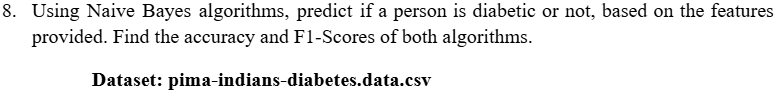

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("drug.csv")
print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

Dataset loaded successfully!
Shape: (200, 6)

First 5 rows:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [ ]:
print("\nMissing values per column:")
print(data.isnull().sum())
data = data.fillna(data.mode().iloc[0])


Missing values per column:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [ ]:
X = data.drop(columns=["Drug"])
y = data["Drug"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_tree = grid.best_estimator_
print(f"\nBest Parameters: {grid.best_params_}")


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [ ]:
y_pred = best_tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



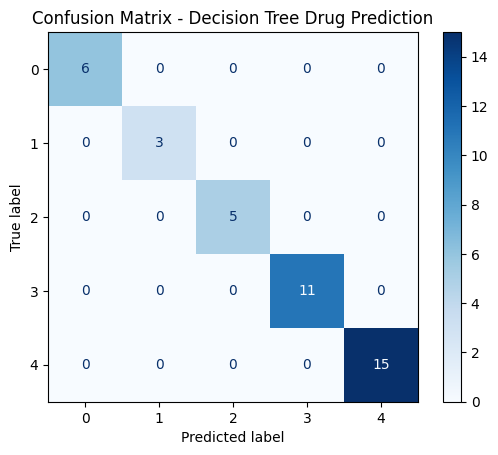

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree Drug Prediction")
plt.show()

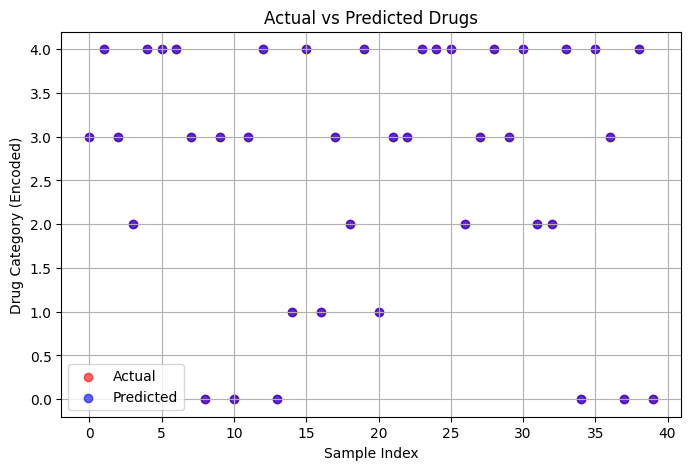

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, color='red', alpha=0.6, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='blue', alpha=0.6, label='Predicted')
plt.title("Actual vs Predicted Drugs")
plt.xlabel("Sample Index")
plt.ylabel("Drug Category (Encoded)")
plt.legend()
plt.grid(True)
plt.show()

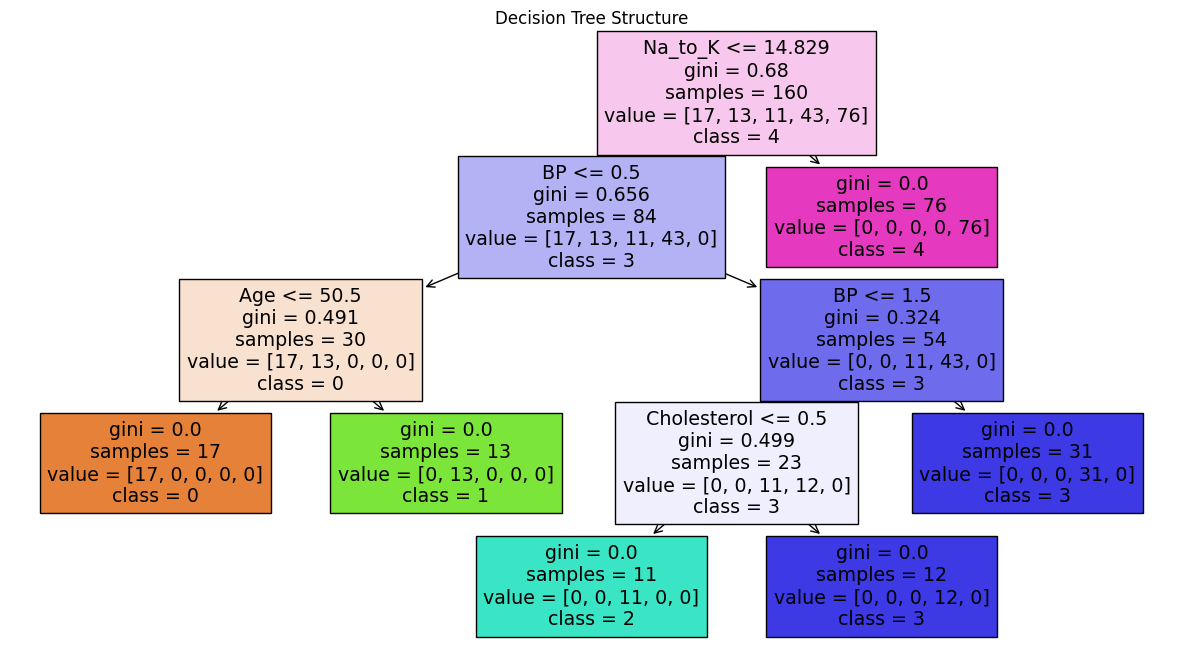

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(
    best_tree,
    filled=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in best_tree.classes_]  # Convert to strings
)
plt.title("Decision Tree Structure")
plt.show()